In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def network_plot(adj_matrix, layout=nx.kamada_kawai_layout, width=0.3):
    # Create a graph from the adjacency matrix
    try:
        adj_matrix = adj_matrix.to_numpy()
    except _:
        pass
    G = nx.from_numpy_array(adj_matrix)

    # Plot the largest component
    plt.figure(figsize=(6, 6))
    pos = layout(G)  # You can change the layout algorithm as needed
    nx.draw(G, pos, with_labels=False, node_size=20, node_color='black', font_size=10, font_weight='bold', edge_color='gray', width=width)
    # plt.title("Largest Component of the Graph")

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    # caption = f"Number of Nodes: {num_nodes}\nNumber of Edges: {num_edges}"
    # plt.text(0.5, -0.1, caption, transform=plt.gca().transAxes, fontsize=12, ha='center')
    print(num_nodes, num_edges)
    plt.show()


In [5]:
import pandas as pd
df = pd.read_csv("graph_school.csv", header=None)

In [6]:
for i in range(129):
    df.iloc[i, i] = 0

129 602


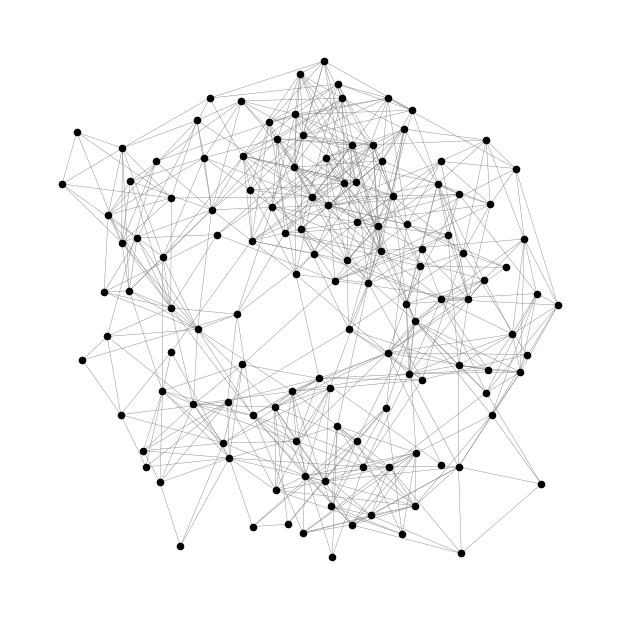

In [7]:
    
network_plot(df)

129 537


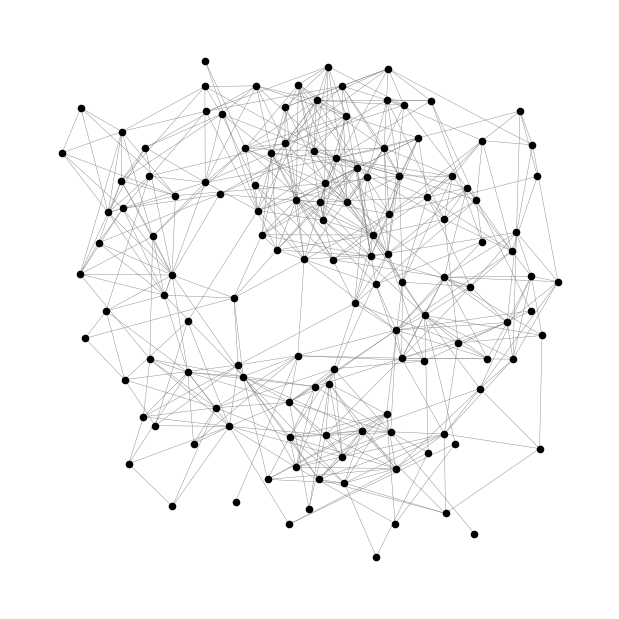

In [8]:
# determine FP edges
# determine FN edges
conf5 = pd.read_csv("conf5_numpy.csv", header=None)
conf5_enemy = pd.read_csv("conf5_enemy_numpy.csv", header=None)
conf5.astype(int)

network_plot(conf5_enemy)

129 602


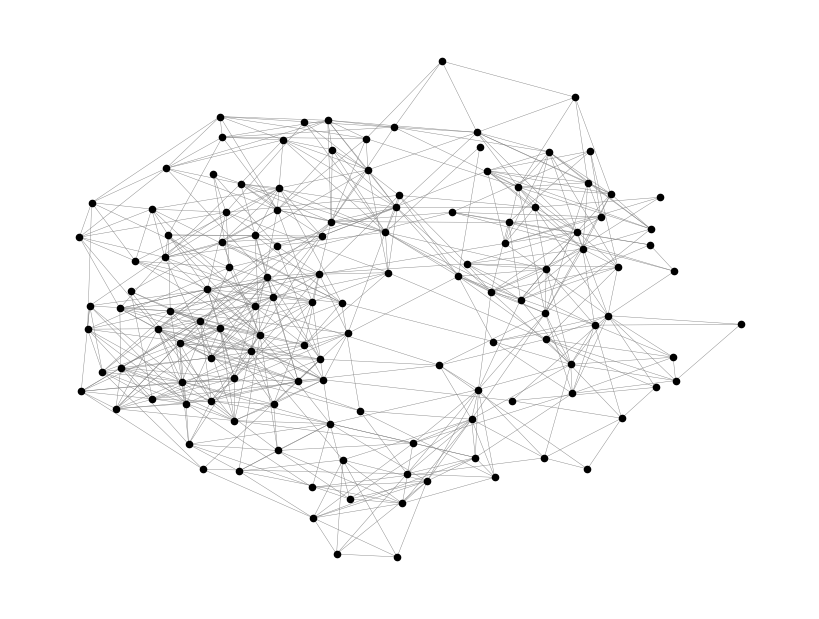

In [16]:
adj_true, adj_pred = df, conf5
layout=nx.kamada_kawai_layout
width=0.3
edge_color_1='gray'
edge_color_2='blue'
save=""
format_=""

if True:
    try:
        adj_true = adj_true.to_numpy()
    except AttributeError:
        pass
    try:
        adj_pred = adj_pred.to_numpy()
    except AttributeError:
        pass
    
    for i in range(adj_true.shape[0]):
        adj_true[i, i] = 0
        
    for i in range(adj_pred.shape[0]):
        adj_pred[i, i] = 0
    
    G_true = nx.from_numpy_array(adj_true)
    G_pred = nx.from_numpy_array(adj_pred)
    
    FP_edges = []
    FN_edges = []
    for edge in G_pred.edges():
        if edge not in G_true.edges():
            FP_edges.append(edge)
    
    for edge in G_true.edges():
        if edge not in G_pred.edges():
            FN_edges.append(edge)



    G = nx.Graph()

    
    # Add True positive edges
    for edge in G_true.edges():
        if edge in FP_edges or edge in FN_edges:
            continue
        G.add_edge(edge[0], edge[1], relationship='TP')

    # Add False negative edges
    for edge in FN_edges:
        G.add_edge(edge[0], edge[1], relationship='FN')

    # Add enemy edges with 'relationship' attribute set to 'enemy'
    for edge in FP_edges:
        G.add_edge(edge[0], edge[1], relationship='FP')

    # Plot the graph with different edge colors based on the 'relationship' attribute
    plt.figure(figsize=(8, 6))

    pos = layout(G)
    TP_edges = [(u, v) for (u, v, rel) in G.edges(data='relationship') if rel == 'FP']
    FP_edges = [(u, v) for (u, v, rel) in G.edges(data='relationship') if rel == 'FP']
    FN_edges = [(u, v) for (u, v, rel) in G.edges(data='relationship') if rel == 'FN']
    

    nx.draw(G, pos, with_labels=False, node_size=20, node_color='black', font_size=12, font_weight='bold', width=width, edge_color='gray')
#     nx.draw_networkx_edges(G, pos, edgelist=TP_edges, edge_color='grey', width=width)
#     nx.draw_networkx_edges(G, pos, edgelist=FP_edges, edge_color='green', width=width)
#     nx.draw_networkx_edges(G, pos, edgelist=FN_edges, edge_color='red', width=0.5)

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(num_nodes, num_edges)
    
    if save == "":
        plt.show()
    elif format_ == 'pdf':
        plt.savefig(save, format = "pdf")
        plt.close()
    else:
        plt.savefig(save)
        plt.close()

(array([ 9.,  9., 37.,  8., 31., 11., 13.,  3.,  5.,  3.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

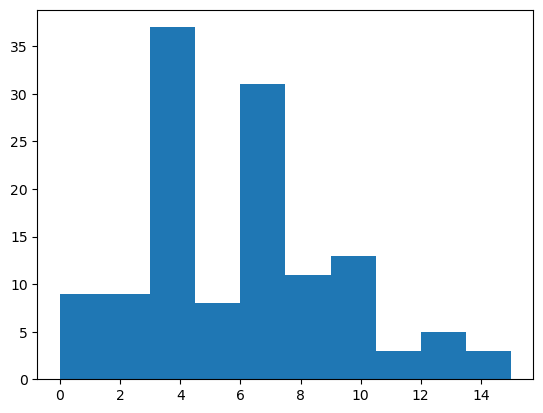

In [11]:
import matplotlib.pyplot as plt
out_degrees = conf5.sum(axis=0)
plt.hist(out_degrees)